<a href="https://colab.research.google.com/github/vinisasaki/iris-classification-model-comparison/blob/main/iris_classification_comparison_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identify Irises using Machine Learning

This classic dataset consists of three species of Iris flowers: *Iris setosa*, *Iris versicolour*, and *Iris virginica*, each with 50 instances. The goal is to apply and compare different methods for identifying each of these classes.

## Installing and using the libraries

In [96]:
!pip install ucimlrepo
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install numpy

In [97]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Loading the dataset

In [98]:
# getting the dataset from UCI Machine Learning Repository
iris = fetch_ucirepo(id=53)

X = iris.data.features  # features Dataframe
y = iris.data.targets   # classes Dataframe (Iris species)

# complete Dataframe
iris_df = pd.concat([X, y], axis=1)

In [99]:
# to display stats about the data
iris_df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [100]:
# displaying basic info about the data type
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We can see that there are no null values in the dataset

## Pre-processing

In [101]:
# checking by code the number of null values
iris_df.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
class,0


In [102]:
# dropping the duplicates values from dataset
iris_df = iris_df.drop_duplicates()

In [103]:
# to display the different classes of dataset
iris_df['class'].value_counts()

,count
class,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


## Exploratory Data Analysis

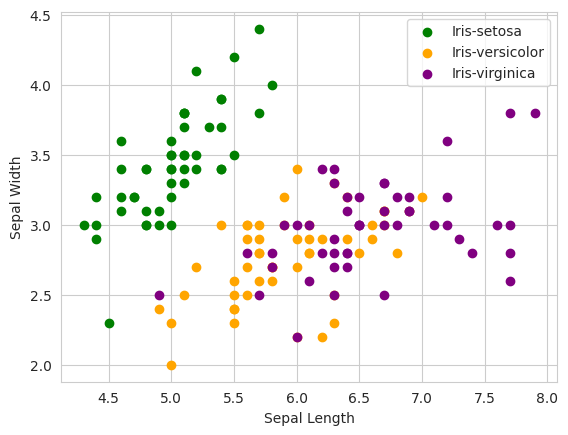

In [104]:
# plotting a scatterplot of all species
colors = ['Green', 'Orange', 'Purple']

# getting a unique value of the column
species = iris_df['class'].unique().tolist()

for i in range(3):
  x = iris_df[iris_df['class'] == species[i]]
  plt.scatter(x['sepal length'], x['sepal width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

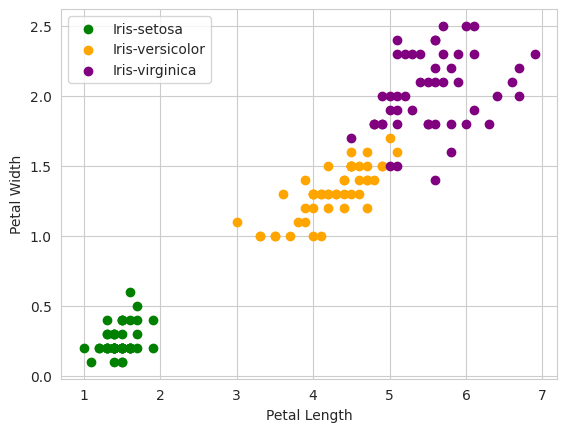

In [105]:
for i in range(3):
  x = iris_df[iris_df['class'] == species[i]]
  plt.scatter(x['petal length'], x['petal width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

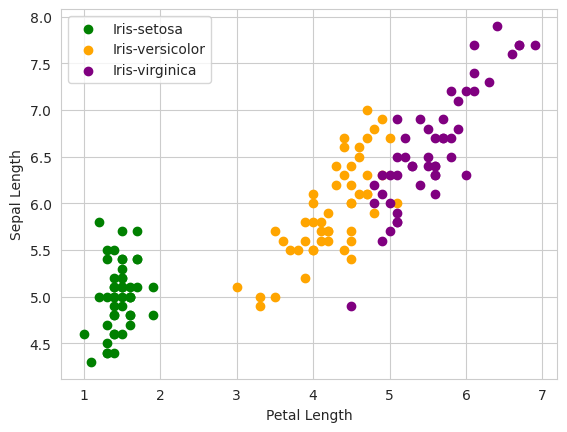

In [106]:
for i in range(3):
  x = iris_df[iris_df['class'] == species[i]]
  plt.scatter(x['petal length'], x['sepal length'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend()
plt.show()

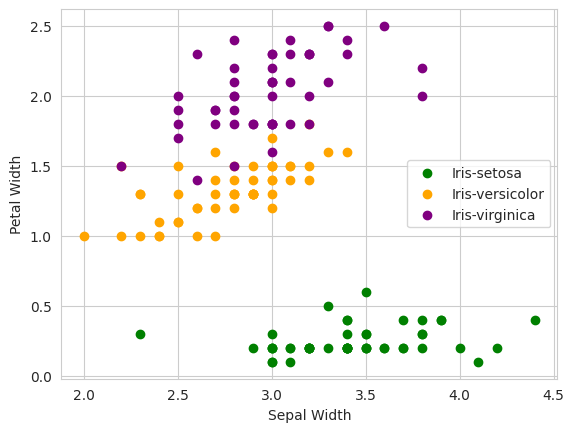

In [107]:
for i in range(3):
  x = iris_df[iris_df['class'] == species[i]]
  plt.scatter(x['sepal width'], x['petal width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

As we can see from graphs, there is a correlation between the sepals and petals

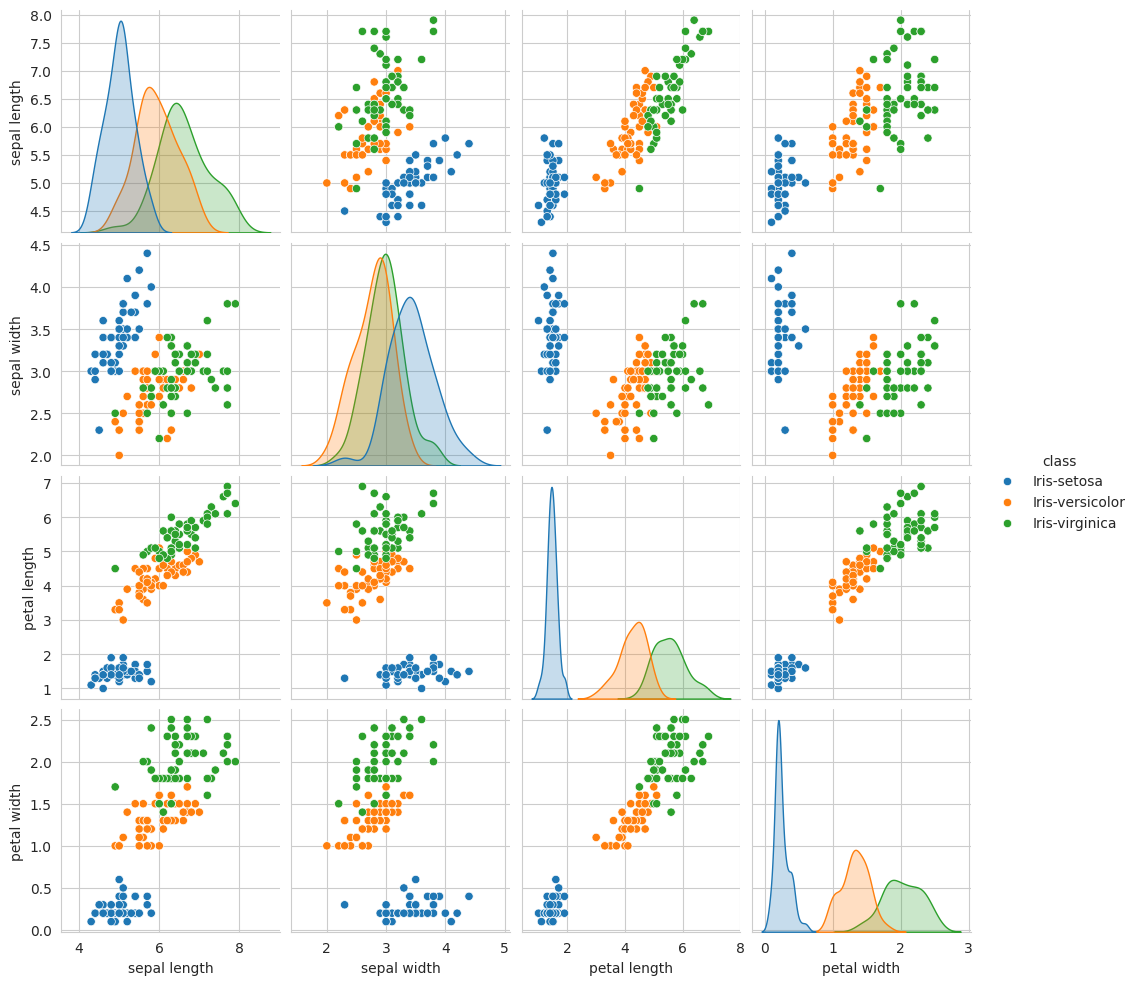

In [108]:
# this is a pairplot, a graph to visualize the relationships between all the variables
sns.set_style("whitegrid")
sns.pairplot(iris_df, hue="class")
plt.show()

It is possible to see that *Iris setosa* almost always appears separate from the others

The *Setosa* species has smaller and less distributed features compared to the other two species. In contrast, the *Virginica* species has a wider range of values and is well distributed, while the *Versicolor* species falls in between the two. This suggests that the distribution of features varies significantly among the species.

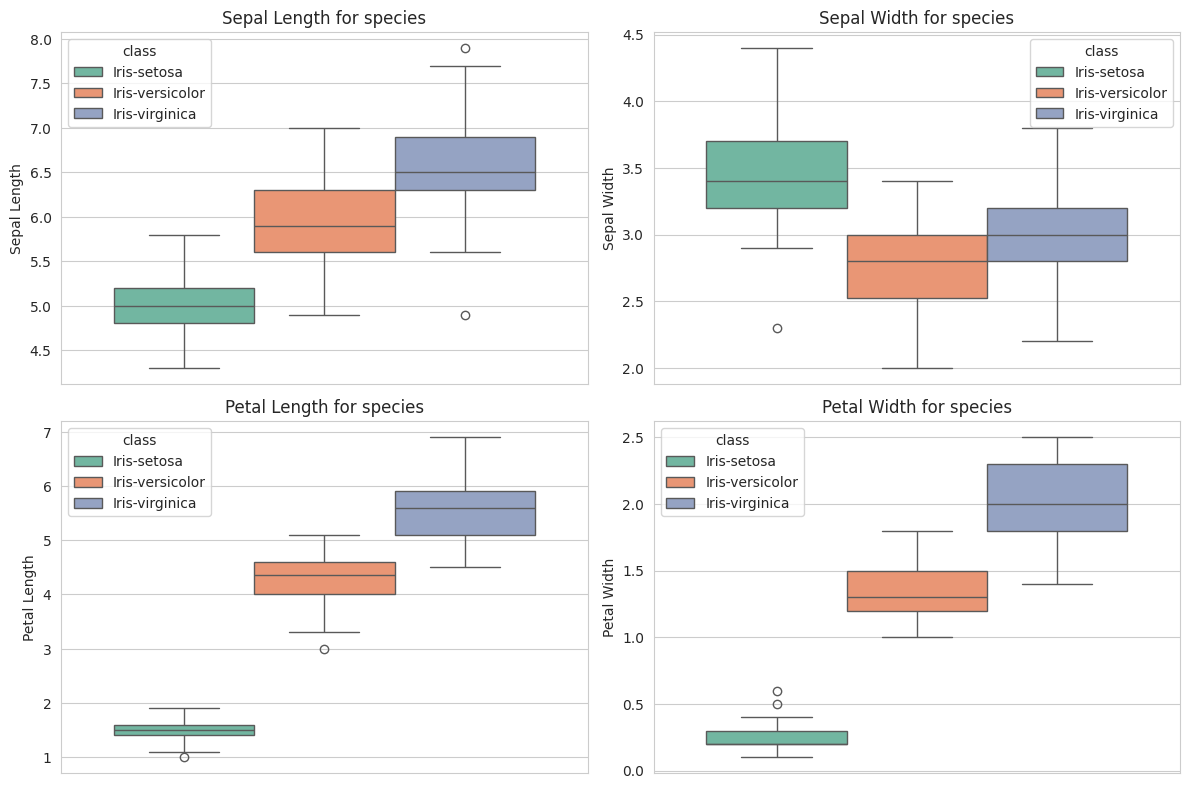

In [109]:
plt.figure(figsize=(12, 8))
features = X.columns.to_list()

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(iris_df, hue="class", y=feature, palette="Set2")
    plt.title(f"{feature.title()} for species")
    plt.xlabel('')
    plt.ylabel(feature.title())

plt.tight_layout()
plt.show()

The boxplots show that petal length and petal width are the most useful features for distinguishing the species. Sepal width has a lot of overlap and is the least helpful on its own. Iris-setosa stands out as easy to separate, while Versicolor and Virginica are more similar and require multiple features to tell them apart.

## Correlation Matrix

A correlation matrix is a square table that shows the pairwise correlations among multiple variables. The values range from −1 to +1, where:

- **−1**: perfect negative correlation  
- **0**: no correlation  
- **+1**: perfect positive correlation  

In [110]:
# dropping the categorical column
corr_matrix = iris_df.drop(columns=['class'])

corr_matrix = corr_matrix.corr()
corr_matrix

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109321,0.871305,0.817058
sepal width,-0.109321,1.000000,-0.421057,-0.356376
petal length,0.871305,-0.421057,1.000000,0.961883
petal width,0.817058,-0.356376,0.961883,1.000000


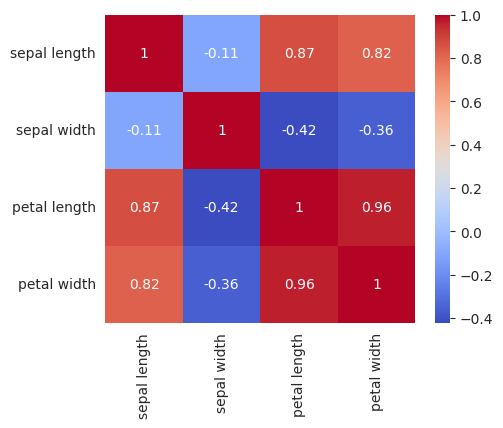

In [111]:
plt.figure(figsize=(5, 4))

# create the heatmap from correlation matrix
# the redder, the more correlated
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Machine Learning Models and Validation Results

### Train/Test Split

The train/test split method divides the dataset into two parts: one for training the model and another for testing it. This allows us to evaluate how the model performs on data it has never seen before.

In [112]:
y = y.to_numpy().ravel() # to transform a array to 1D

# It was used 80% of dataset for train and 20% for test, this is called "train test split"
# "stratify" is to ensure that the proportion of each class in my training set
# and in my testing set is exactly the same as the proportion in the original dataset

# "random_state" is to ensures the random shuffling process produces the same
# result every time, which makes reproducibility possible later on

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [113]:
print(f"Total number of dataset samples: {len(X)}")

print("-" * 30)

print(f"Number of train samples: {len(X_train)}")
print(f"Number of test samples:  {len(X_test)}")

print("-" * 30)

print(f"X_train shape (train): {X_train.shape}")
print(f"X_test shape (test):   {X_test.shape}")

Total number of dataset samples: 150
------------------------------
Number of train samples: 120
Number of test samples:  30
------------------------------
X_train shape (train): (120, 4)
X_test shape (test):   (30, 4)


In [114]:
# Data scaling is necessary to put all numerical variables on a common scale.
# This avoids having the algorithm place more importance on certain columns
# simply because of their larger numerical values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class_names = iris.data.targets['class'].unique()

### Logistic Regression

It calculates the probability of a data point belonging to a specific class. To do this, it uses a mathematical function called the "sigmoid" which transforms any numerical value into a probability between 0 and 1. If the probability is greater than a threshold (usually 0.5), the model classifies it as "yes" (class 1); otherwise, as "no" (class 0).

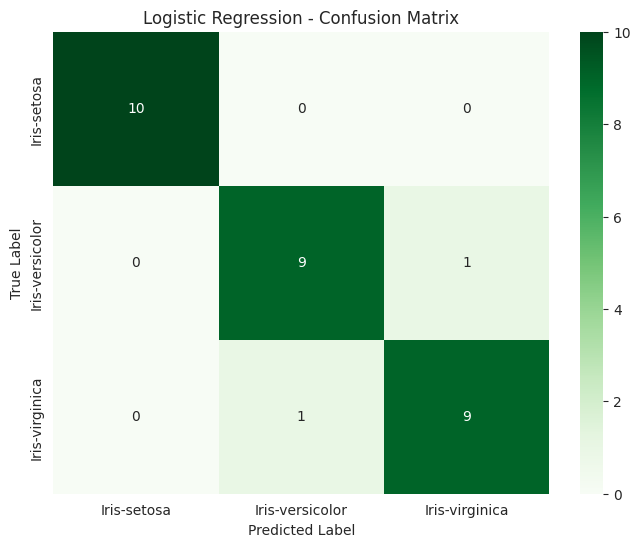

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [115]:
model_logR = LogisticRegression()

model_logR.fit(X_train_scaled, y_train)
y_pred_logR = model_logR.predict(X_test_scaled)

cm_logR = confusion_matrix(y_test, y_pred_logR)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logR, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(y_test, y_pred_logR, target_names=class_names))

### K-Nearest Neighbors (KNN)

To classify a new point, KNN looks at the 'K' nearest data points to it in the training set. The class that is most common among these 'K' neighbors is the class assigned to the new point. 'K' is a number that you define (e.g., 5 nearest neighbors).

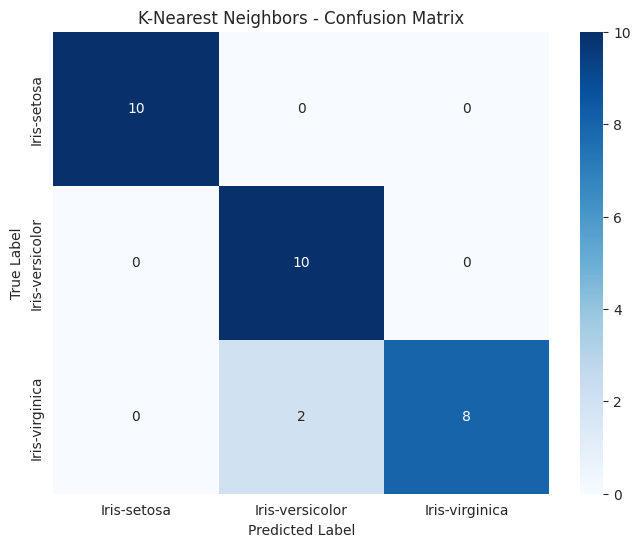

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



In [116]:
model_knn = KNeighborsClassifier()

model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('K-Nearest Neighbors - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(y_test, y_pred_knn, target_names=class_names))

### Support Vector Machines - SVM

Instead of just drawing a line to separate the classes, SVM tries to find the hyperplane (a line in 2D space, or a plane in 3D space) that maximizes the distance to the nearest data points of each class. This distance is called the 'margin.' The points that define this margin are the 'support vectors.' By maximizing the margin, the model tends to generalize better to new data.

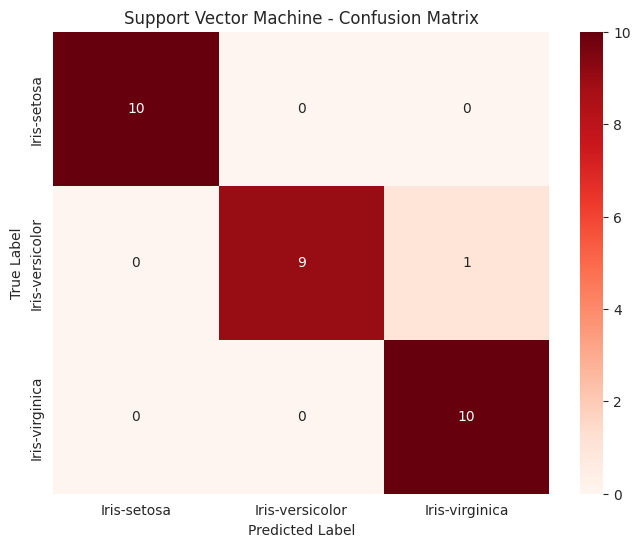

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [117]:
model_svm = SVC()

model_svm.fit(X_train_scaled, y_train)
y_pred_svm = model_svm.predict(X_test_scaled)

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Support Vector Machine - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(y_test, y_pred_svm, target_names=class_names))

### Decision Trees

The model learns a hierarchy of questions about the data's features. Each question splits the data into a branch of the tree, and the process continues until a final decision (a 'leaf' of the tree) is reached.

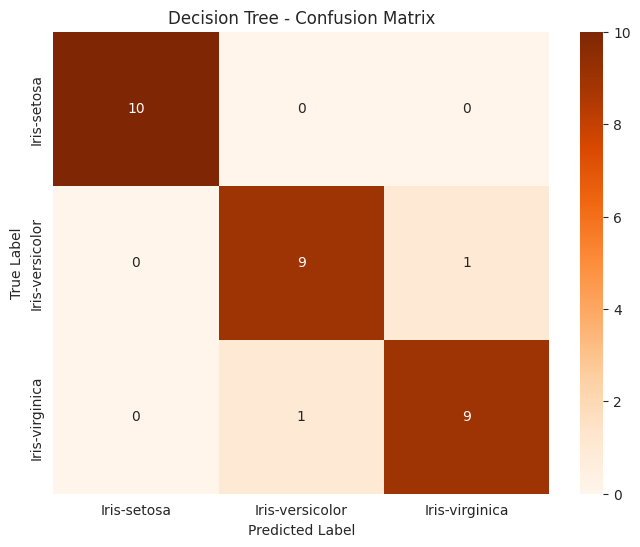

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [118]:
model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Decision Tree - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(y_test, y_pred_dt, target_names=class_names))

### Random Forest

Instead of relying on a single tree, the Random Forest builds hundreds of decision trees. Each tree is trained on a slightly different sample of the data and using a random subset of the features. To classify a new data point, each tree in the forest 'votes' for its preferred class. The class that receives the most votes wins. This makes the model much more robust and less prone to overfitting.

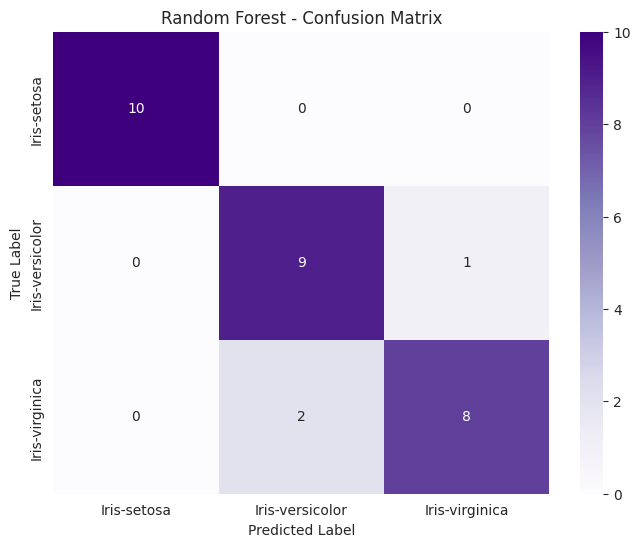

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



In [119]:
model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Random Forest - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(y_test, y_pred_rf, target_names=class_names))

### Gradient Boosting

The model starts with a very simple and weak tree. Next, it builds a second tree that focuses on correcting the errors that the first tree made. The third tree corrects the combined errors of the first and second, and so on.

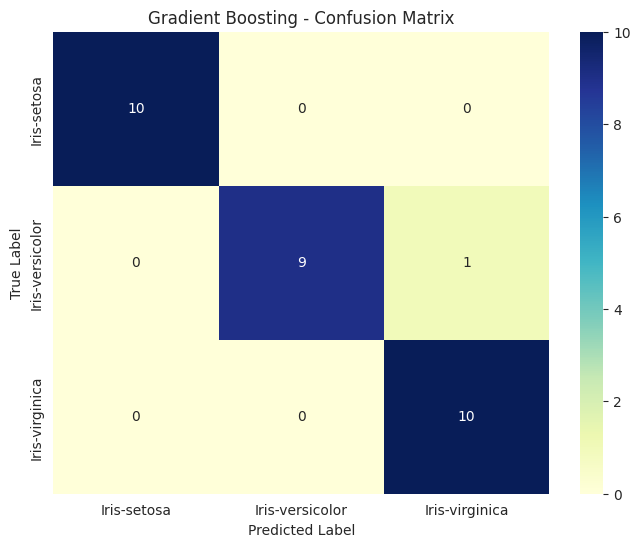

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [120]:
model_gb = GradientBoostingClassifier(random_state=42)

model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Gradient Boosting - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(y_test, y_pred_gb, target_names=class_names))

### Naive Bayes

Naive Bayes is a classifier based on Bayes' Theorem of probability. It is called 'naive' because it assumes that the features are independent of one another. It calculates the probability of a data point belonging to a class, given a set of features.

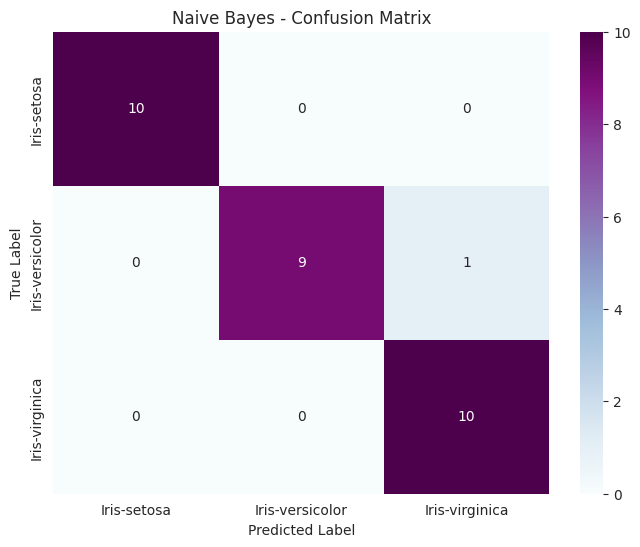

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [121]:
model_nb = GaussianNB()

model_nb.fit(X_train_scaled, y_train)
y_pred_nb = model_nb.predict(X_test_scaled)

cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='BuPu',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Naive Bayes - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(y_test, y_pred_nb, target_names=class_names))

In [122]:
# using a list of dictionaries to organize the results
performance_summary = [
    {'Model': 'Logistic Regression', 'Accuracy': accuracy_score(y_test, y_pred_logR)},
    {'Model': 'K-Nearest Neighbors', 'Accuracy': accuracy_score(y_test, y_pred_knn)},
    {'Model': 'Support Vector Machine', 'Accuracy': accuracy_score(y_test, y_pred_svm)},
    {'Model': 'Decision Tree', 'Accuracy': accuracy_score(y_test, y_pred_dt)},
    {'Model': 'Random Forest', 'Accuracy': accuracy_score(y_test, y_pred_rf)},
    {'Model': 'Gradient Boosting', 'Accuracy': accuracy_score(y_test, y_pred_gb)},
    {'Model': 'Naive Bayes', 'Accuracy': accuracy_score(y_test, y_pred_nb)}
]

df_performance = pd.DataFrame(performance_summary)

# sorting the results from highest to lowest
df_performance_sorted = df_performance.sort_values(by='Accuracy', ascending=False)

display(df_performance_sorted)

,Model,Accuracy
2,Support Vector Machine,0.966667
5,Gradient Boosting,0.966667
6,Naive Bayes,0.966667
1,K-Nearest Neighbors,0.933333
0,Logistic Regression,0.933333
3,Decision Tree,0.933333
4,Random Forest,0.900000


With an 80%/20% train-test split (using random_state=42), the Support Vector Machine, Gradient Boosting, and Naive Bayes models were the best-performing, achieving 96.67% accuracy. Meanwhile, Random Forest exhibited the worst performance, and the remaining models achieved identical scores.

### Cross-validation

Cross-validation is a technique that splits the dataset into several parts (folds) and trains the model multiple times, each time using a different part for testing. This provides a more reliable and stable evaluation of the model's performance.

Now using cross-validation to observe variations in performance:

In [123]:
# a pipeline is an object that automates the assembly line.
# It packages a sequence of steps into a single object, which can be treated
# as a single item

# When using cross-validation, a Pipeline ensures that preprocessing
# (like scaling) is applied independently and correctly within each fold of the process,
# which in turn prevents data leakage

pipelines = {
    "Logistic Regression": Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())]),
    "K-Nearest Neighbors": Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier())]),
    "Support Vector Machine": Pipeline([('scaler', StandardScaler()), ('model', SVC())]),
    "Decision Tree": Pipeline([('model', DecisionTreeClassifier(random_state=42))]),
    "Random Forest": Pipeline([('model', RandomForestClassifier(random_state=42))]),
    "Gradient Boosting": Pipeline([('model', GradientBoostingClassifier(random_state=42))]),
    "Naive Bayes": Pipeline([('scaler', StandardScaler()), ('model', GaussianNB())])
}

results_after_cv = []

# calculating performance after cross-validation
for name, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    results_after_cv.append({'Model': name, 'After CV (Mean)': cv_scores.mean()})

df_after = pd.DataFrame(results_after_cv)

# merging the before dataset to this, to comparison of results
df_comparison = pd.merge(df_performance, df_after, on='Model')

df_comparison = df_comparison.sort_values(by='After CV (Mean)', ascending=False)

display(df_comparison)

,Model,Accuracy,After CV (Mean)
4,Random Forest,0.900000,0.966667
2,Support Vector Machine,0.966667,0.966667
0,Logistic Regression,0.933333,0.960000
5,Gradient Boosting,0.966667,0.960000
1,K-Nearest Neighbors,0.933333,0.960000
3,Decision Tree,0.933333,0.953333
6,Naive Bayes,0.966667,0.953333


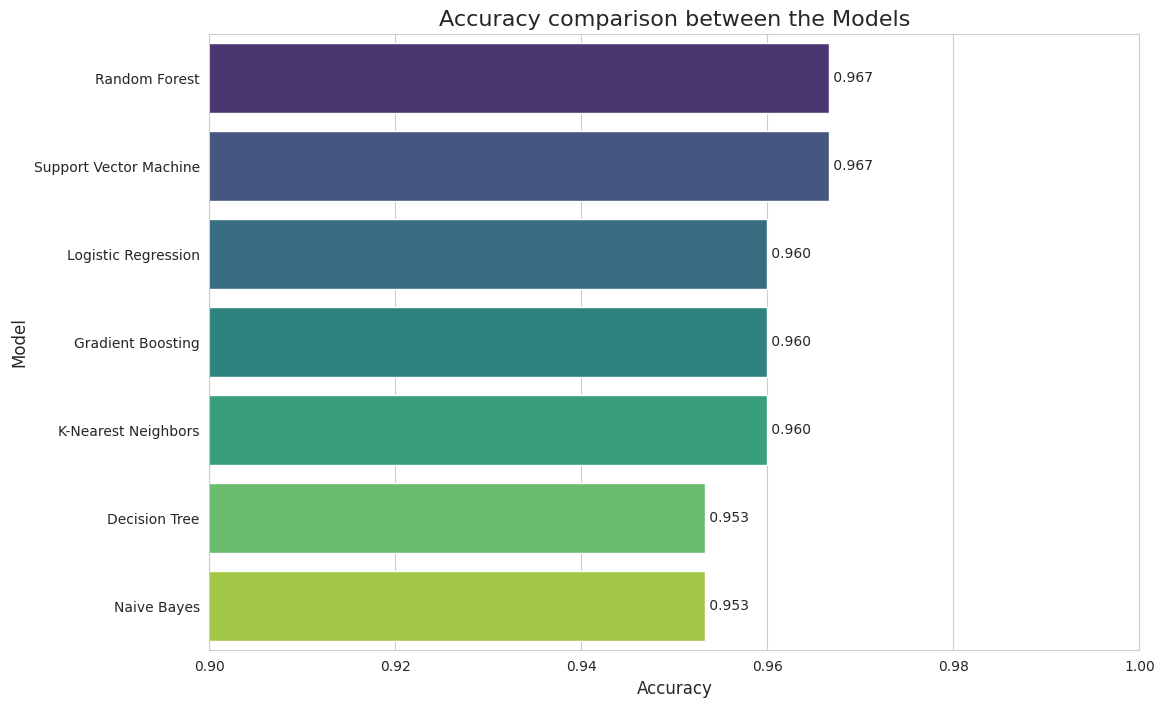

In [124]:
# visualizing the final results with a bar graph
plt.figure(figsize=(12, 8))

sns.barplot(df_comparison, x='After CV (Mean)', y='Model',
            hue='Model', palette='viridis', legend=False)

for index, value in enumerate(df_comparison['After CV (Mean)']):
    plt.text(value, index, f' {value:.3f}', va='center')

plt.title('Accuracy comparison between the Models', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0.9, 1.0)
plt.show()

## Conclusion

The goal of this project was to develop and evaluate machine learning models for the classification of flower species from the Iris dataset.

An exploratory data analysis was conducted, followed by preprocessing (scaling) and the application of seven different classification algorithms. The final evaluation was performed using Cross-Validation (K-Fold with k=5) to ensure a robust and reliable performance estimate, using Scikit-learn pipelines to prevent data leakage.

The Support Vector Machine (SVM) and Random Forest models were identified as the best-performing models, both achieving an average accuracy of 96.7%. The analysis also highlighted the importance of cross-validation, which corrected the potentially misleading view from a single train-test split.

This project reinforces that, despite its simplicity, the Iris dataset is extremely versatile. It allows for the exploration of many other techniques beyond classification. The possibilities for analysis, even with such a well-known dataset, are vast, and it serves as an excellent training ground for new methodologies.